# Tutorial 3 (a)
# Linear Regression

## Exploring the Housing dataset
Source: https://archive.ics.uci.edu/ml/datasets/Housing
Attributes:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [1]:
# import pandas data set
import pandas as pd

# Load the dataset into dataframe (df) from the UCI link 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

# Assign the names to the columns of the dataset
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Display first 5 records
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [35]:
df.shape

(506, 14)

Before proceeding into Regression analysis, we first analyse the data set to understand the correlation among features (variables) of the data set.

## Pair Plot

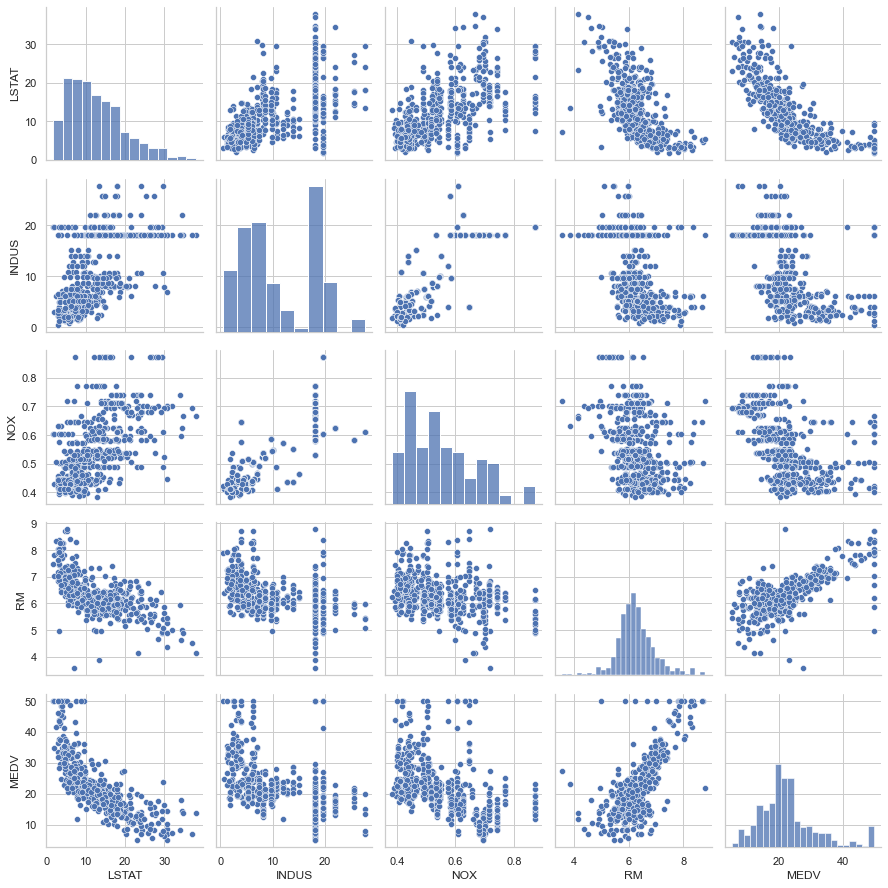

In [2]:
# import the libraries for the plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot using swaborn library
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# Display the pairplot using the above-mentioned columns
sns.pairplot(df[cols], height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

## Heatmap

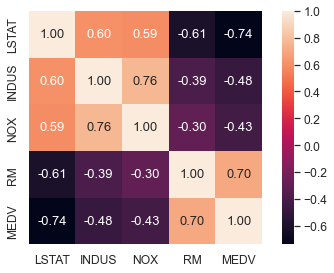

In [3]:
import numpy as np

# Initialise an object (cm) using np object
cm = np.corrcoef(df[cols].values.T)

# Set the font size of the plot
sns.set(font_scale = 1.1)

hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 13},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

# Implementing at a simple regression model - Ordinary least squares

In [4]:
# Create a class named as 'LinearRegressionGD'
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [5]:
X = df[['RM']].values
y = df[['MEDV']].values

In [6]:
X.shape, y.shape

((506, 1), (506, 1))

In [7]:
# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler

# Initialise the objects using StandardScaler() 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [8]:
# Reshape the (506, 1) to (506,) array for Machine Learning model
y_std = np.reshape(y_std, 506)

# Display the number of rows and columns
X_std.shape, y_std.shape

((506, 1), (506,))

In [9]:
# Initialise an object (lr) using the created function LinearRegressionGD()
lr = LinearRegressionGD()

# Train the model by calling fit() mentiof
lr.fit(X_std, y_std)

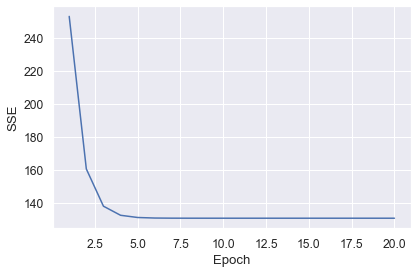

In [10]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           # SSE means 'sum of squares error'
plt.xlabel('Epoch')         # The number of epochs is a hyperparameter that defines the number times 
                            # that the learning algorithm will work through the entire training 
                            # dataset. One epoch means that each sample in the training dataset has 
                            # had an opportunity to update the internal model parameters. 
                            # An epoch is comprised of one or more batches.
plt.tight_layout()
plt.savefig('cost.png', dpi = 300)
plt.show()

In [11]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

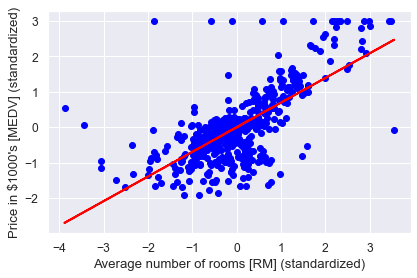

In [12]:
# Call the method lin_regplot()
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

In [13]:
# Display the slope and intercept of the line
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [14]:
# Transform the price of a number of the rooms
num_rooms_std = sc_x.transform([[5.0]]) 

# Predicted price based on the number of the rooms
price_std = lr.predict(num_rooms_std)

# Reshape the price_std array to be 2D
price_std_2d = price_std.reshape(-1, 1)

# Display the predicted price based on 5.0
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std_2d))

Price in $1000's: 10.840


# Estimating coefficient of a regression model via scikit-learn

In [15]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X, y)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


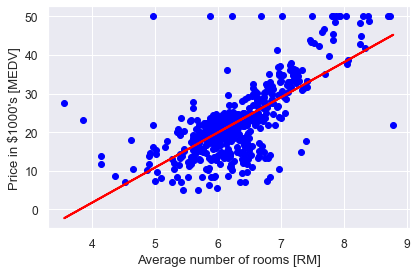

In [16]:
# Display the regression plot using lin_regplot() method
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

# Fitting a robust regression model using RANSAC

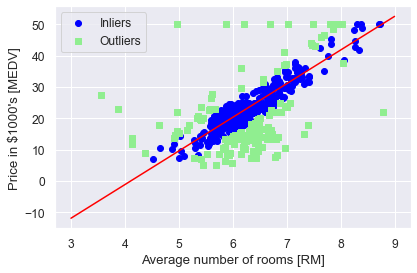

In [17]:
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling an object RANSACRegressor()
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 100, 
                         min_samples = 50,                          
                         residual_threshold = 5.0, 
                         random_state = 0)
ransac.fit(X, y)

# Store the values for inlier and outlier masks
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

In [18]:
# Display the coefficients and intercepts
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


# Evaluating the performance of linear regression models

In [19]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df.iloc[:, :-1].values               # All features (independent varaibles) except MEDV 
y = df['MEDV'].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((506, 13), (506,), (354, 13), (152, 13), (354,), (152,))

In [20]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Trian the model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
# print(y_train_pred, '\t', y_test_pred)

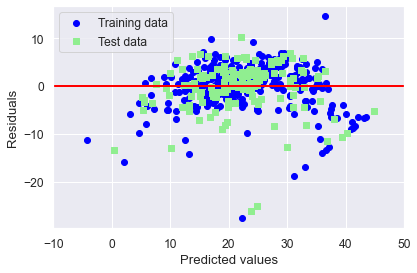

In [21]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [22]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.67


In [24]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.66


In [25]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.67


# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.71
Test set score: 0.61
Number of features used: 10


In [27]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.76
Test set score: 0.67
Number of features used: 13


In [28]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.76
Test set score: 0.67
Number of features used: 13


# ElasticNet
In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. Practically, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

Any alpha value between 0–1 will perform an elastic net. When alpha = 0.5 we perform an equal combination of penalties whereas alpha <0.5 will have a heavier ridge penalty applied and alpha >0.5 will have a heavier lasso penalty.

In [29]:
# Load library for the ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)

e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean_square_error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 31.87361081774105


In [30]:
print(e_net.coef_, e_net.intercept_)

[-0.08344408  0.05179376 -0.01702468  0.         -0.          0.90890973
  0.01218953 -0.83010765  0.23558231 -0.01502425 -0.84881663  0.00687826
 -0.72504946] 45.20452380831045


# Decision tree regression

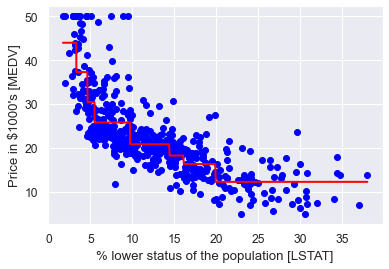

In [31]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Store the feature or attribute values in X and y
X = df[['LSTAT']].values
y = df['MEDV'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
# plt.savefig('./figures/tree_regression.png', dpi = 300)
plt.show()

# Random forest regression

In [32]:
# Declaration of Varaibles
X = df.iloc[:, :-1].values          # Store all columns into an array (X) except last column, 'MEDV'
y = df['MEDV'].values               # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [33]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.979, test: 0.877


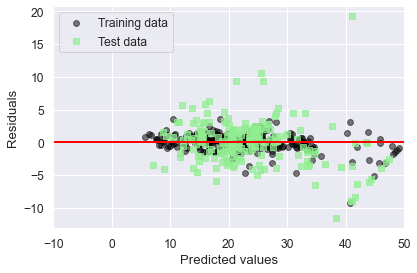

In [34]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

# Tasks
Use the dataset available on Moodle and discuss the relationship between the variables for the life expectancy using 
1) Linear Regression

2) Ridge Regression

3) Lasso Regression

4) Regression using Decision Tree and RandomForest

(Online availability of dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who/)

### Reference: 
Chapter 10,  Predicting Continuous Target Variables with Regression Analysis, Python Machine Learning Second Edition, Sebastian Raschka, Vahid Mirjalili, Copyright © 2017 Packt Publishing.